## **COMPUTER VISION - PROJECT - Ms.Dipali Jain (JUNE 2021)**

# **PART 1 - PROJECT BASED**

**• DOMAIN:** Botanical research

**• CONTEXT:** 

University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo

**• DATA DESCRIPTION:** 

The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/
plant-seedlings-classification/data


**• PROJECT OBJECTIVE**: 

University’s management require an automation which can create a classifier capable of
determining a plant's species from a photo

## **Steps and tasks::**

1. Import the data. Analyse the dimensions of the data. Visualise the data.

2. Design, train tune and test the best AIML image classifier model using:
• Supervised learning algorithms
• Neural networks
• CNN

3. Compare the results from the above step along with your detailed observations on the best performing algorithm and
why/how it outperforms other algorithms in this case.

4. Pickle the best performing model.

5. Import the the test image [ from the “ Prediction” folder ] to predict the class. Display the image. Use the best trained
image classifier model to predict the class.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [2]:
# Import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import os 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**• Import all the given datasets and explore shape and size of each.**

Let's walk through the directory to find the names of the classes and number of images in each class. 

In [4]:
train_path ="/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data/train"
test_path = "/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data"

In [5]:
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data"): 
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data'.
There are 0 directories and 1 images in '/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data/Seedling - Prediction'.
There are 12 directories and 0 images in '/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data/train'.
There are 0 directories and 263 images in '/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data/train/Black-grass'.
There are 0 directories and 390 images in '/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data/train/Charlock'.
There are 0 directories and 287 images in '/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data/train/Cleavers'.
There are 0 directories and 611 images in '/con


* There is 1 image in test folder which will be used for testing.

* There are images for each class in a directory structure for training.

* In this dataset, the images of 12 different plant species are placed in different folders. The names of these folders are the labels of their species respectively. In the next step, we will use glob() function to iterate through all the folders and extract their labels.

In [6]:
from mpl_toolkits.axes_grid1 import ImageGrid
import glob

**Change the directory to walk through the train set and extract labels**

In [7]:
cd /content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Part-1 - Plant Seedling Classification Data

/content/drive/.shortcut-targets-by-id/10Pk9PMfUOAPI3yTYZ6nvtwBA1CXRC9MG/Part-1 - Plant Seedling Classification Data


**We can see 12 class names extracted as Labels.**

In [8]:
paths = glob.glob("train/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}\n".format(label_names))

Total labels: 12
Labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']



### **Visualizing the dataset**

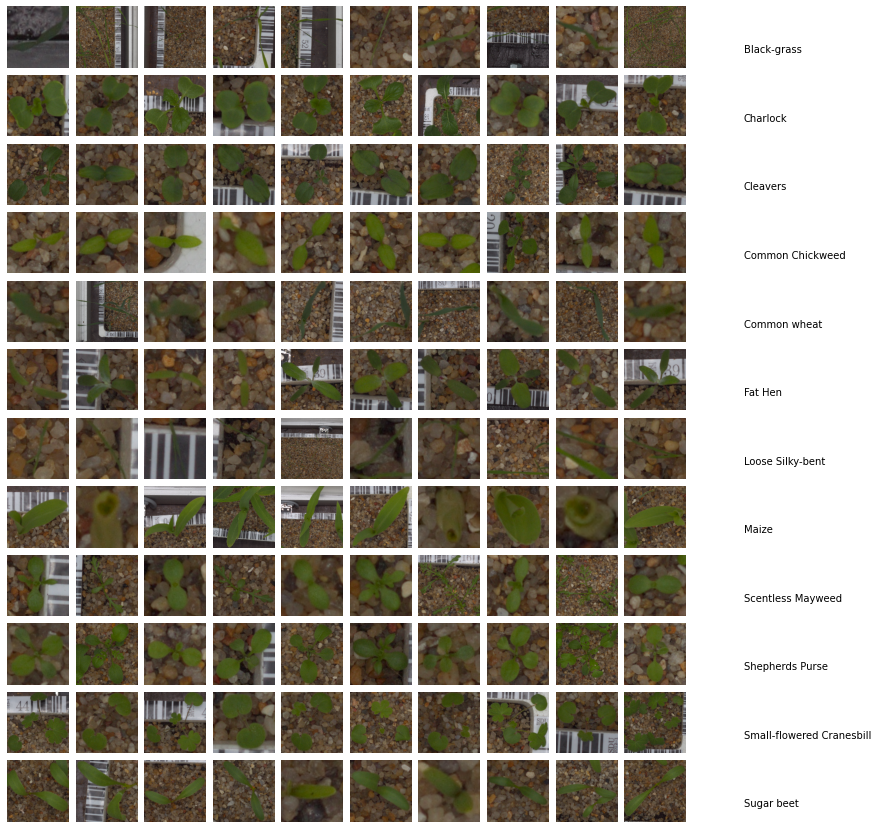

In [9]:
#Now, let's explore the images to see how they look, their shape, size, colors,
# and so on. Firstly, we will view the images of all the 12 different plant species.

import cv2
fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)

    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

**Before, we proceed further, it's important to know the dimensions of these images. When working with OpenCV Python, images are stored in numpy ndarray.** 

**To get the image shape or size, we use ndarray.shape to get the dimensions of the image.**

In [10]:
img.shape

(150, 150, 3)

**It is observed that the original images have height and width of 150 and third dimension 3 indicates that the images are of 3 channels i.e. RGB color images.**

### **Read all the input images and segregate them according to the class of species.**

In [11]:
from glob import glob
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(train_path):
    class_folder_path = os.path.join(train_path, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missing value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

**Now, let's find the total number of images in our dataset.**

**Seperate training and Validation data for future use.**

In [12]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                 batch_size = 32,
                                                                 seed=42,
                                                                 validation_split=0.2,
                                                                subset="training")

Found 4767 files belonging to 12 classes.
Using 3814 files for training.


In [13]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=False,
                                                                 image_size=(224,224),
                                                                 batch_size = 32,
                                                                 seed=42,
                                                                 validation_split=0.2,
                                                                 subset="validation")

Found 4767 files belonging to 12 classes.
Using 953 files for validation.


In [14]:
len(images)

4767

**There are 4767 images in total of all 12 classes of species.**

### **Resizing images** 

**Some images captured by a camera and fed to our AI algorithm vary in size, therefore, we should establish a base size for all images fed into our AI algorithms by resizing them.**

In [15]:
# resize image
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(128,128), interpolation = cv2.INTER_CUBIC)
  return res

#save resized images into images.
images = [resize_images(img) for img in images]

In [16]:
#see number of images in each label
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)

images shape:  (4767, 128, 128, 3)
classes shape:  (4767,)


In [17]:
class_names = training_data.class_names
class_names

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

**Visualize Distribution of images in each class**

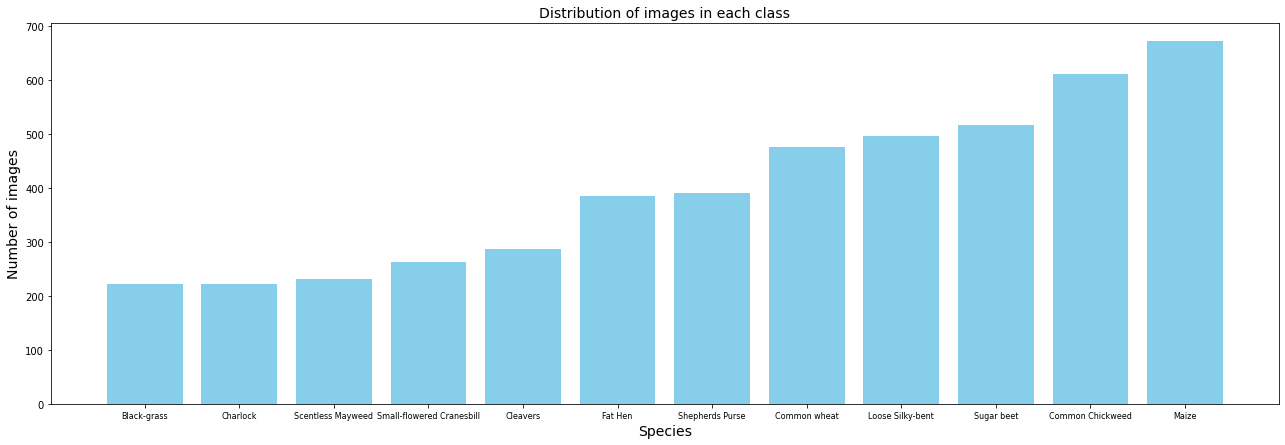

In [18]:
import matplotlib as mp

values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

values.sort()

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values, color='skyblue')
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10)
plt.xlabel("Species", fontsize = 14)
plt.ylabel("Number of images", fontsize = 14)
plt.title("Distribution of images in each class", fontsize=14)
plt.show()

**Not all the species have equal number of images. The plant species 'Maize' has the highest number of images around 680 images roughly. Whereas, the 'Black Grass' plant species has the least number of images with around 220 images. The dataset is imbalanced**.

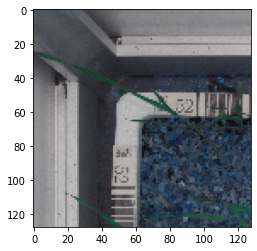

In [19]:
# Let's see the image using index
plt.imshow(images[50])

**Let's observe some images from the class "Shepherds Purse" by refering the label** 

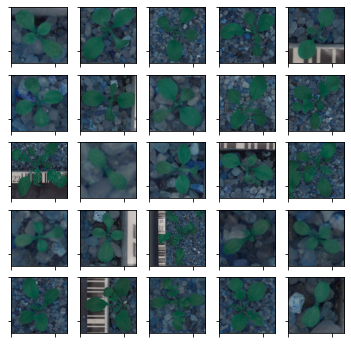

In [20]:
def plot_for_class(label):
    nb_rows = 5
    nb_cols = 5
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Shepherds Purse")

# **Data Preprocessing**

Let's carry out following preprocessing steps before preapring a model:

* Label Encoding
* Splitting the dataset into train, test and validation set.

## **Label Encoder**

### **One-hot encode the class vector**


*   convert class vectors (integers) to binary class matrix convert y_train and y_test
*   number of classes: 12
*   we are doing this to use categorical_cross entropy as loss

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as RandomizedPCA

enc = LabelEncoder()
y = enc.fit_transform(classes)

num_classes = len(np.unique(y))

print("The number of class label encoders: {}".format(num_classes))

The number of class label encoders: 12


**Train test split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

**Creating validation set**

splitting test and validation sets each with 50% of data

In [23]:
random_seed = 2
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [24]:
print(f"The Shapes of Train, Test and Validation sets are: {X_train.shape},{X_test.shape},{X_val.shape}")

The Shapes of Train, Test and Validation sets are: (3336, 128, 128, 3),(715, 128, 128, 3),(716, 128, 128, 3)


In [25]:
print(f"The Shapes of Train, Test and Validation sets of Target are: {y_train.shape},{y_test.shape},{y_val.shape}")

The Shapes of Train, Test and Validation sets of Target are: (3336,),(715,),(716,)


# **Classification using Supervised Learning Techniques**

### **Let's create a dataframe to record performance metrics of different models.**

In [26]:
# Creating a dataframe to record models' performance metrics

model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Loss','Predicted Class'])

In [27]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return class_names[tf.argmax(prediction_probabilities)]

* The dataset have over 65536 (256*256) features for each image and only 3336 images total in train dataset.

* PCA is a way of linearly transforming the data such that most of the information in the data is contained within a smaller number of features called components.

* For performing PCA for colored images, the images have to be flattened and then split into their red, green and blue channels.

* PCA is then applied to each channel, and finally these channels are again concatenated to 3 dimensions. 

In [28]:
def flatten(X):
  Xr, Xg, Xb = [],[],[]
  for samples in X:
    r, g, b = cv2.split(samples)
    Xr.append(r.flatten())
    Xg.append(g.flatten())
    Xb.append(b.flatten())
  Xr = np.array(Xr)
  Xg = np.array(Xg)
  Xb = np.array(Xb)
  return (Xr, Xg, Xb)

In [29]:
X_train_r, X_train_g, X_train_b = flatten(X_train)
X_test_r, X_test_g, X_test_b = flatten(X_test)
X_val_r, X_val_g, X_val_b = flatten(X_val)

In [30]:
X_train_r.shape, X_train_g.shape, X_train_b.shape,
X_test_r.shape, X_test_g.shape, X_test_b.shape,
X_val_r.shape, X_val_g.shape, X_val_b.shape

((716, 16384), (716, 16384), (716, 16384))

Let's use Randomized PCA to extract 500 components from each R,G and B channel

In [31]:
n_components = 500
X_train_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_r)
X_train_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_g)
X_train_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_b)

X_test_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_r)
X_test_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_g)
X_test_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_b)

X_val_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_r)
X_val_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_g)
X_val_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_b)

In [32]:
Xr_train_pca = X_train_pca_r.transform(X_train_r)
Xg_train_pca = X_train_pca_g.transform(X_train_g)
Xb_train_pca = X_train_pca_b.transform(X_train_b)

Xr_test_pca = X_test_pca_r.transform(X_test_r)
Xg_test_pca = X_test_pca_g.transform(X_test_g)
Xb_test_pca = X_test_pca_b.transform(X_test_b)

Xr_val_pca = X_val_pca_r.transform(X_val_r)
Xg_val_pca = X_val_pca_g.transform(X_val_g)
Xb_val_pca = X_val_pca_b.transform(X_val_b)

**Let's check explained variance ratio**

In [33]:
X_train_pca_r.explained_variance_ratio_.sum(), X_train_pca_g.explained_variance_ratio_.sum(), X_train_pca_b.explained_variance_ratio_.sum(),
X_test_pca_r.explained_variance_ratio_.sum(), X_test_pca_g.explained_variance_ratio_.sum(), X_test_pca_b.explained_variance_ratio_.sum(),
X_val_pca_r.explained_variance_ratio_.sum(), X_val_pca_g.explained_variance_ratio_.sum(), X_val_pca_b.explained_variance_ratio_.sum()

(0.9849121117214304, 0.9792409876950097, 0.9832636064682985)

In [34]:
X_train_pca = np.concatenate([Xr_train_pca,Xg_train_pca,Xb_train_pca], axis=1)
X_test_pca = np.concatenate([Xr_test_pca,Xg_test_pca,Xb_test_pca], axis=1)
X_val_pca = np.concatenate([Xr_val_pca,Xg_val_pca,Xb_val_pca], axis=1)

**Check the final shape of train, test and validation set after PCA**

In [35]:
X_train_pca.shape, y_train.shape,
X_test_pca.shape, y_test.shape,
X_val_pca.shape, y_val.shape

((716, 1500), (716,))

# **2.** **Design, train tune and test the best AIML image classifier model using:**

• Supervised learning algorithms

• Neural networks

• CNN

# **Supervised learning algorithms**

### **Random Forest Classifier Model**

Random forest, as its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest declares a class prediction and the class with the most votes becomes the model’s prediction. 

In [36]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.cluster import KMeans

## **Random Forest Classifier**

For Random Forest algorithm, the hyperparameters chosen are 'n_estimators', 'min_samples_leaf', and are defined in param_grid.

In [38]:
param_grid=[
            {'n_estimators':[100,200],
             'min_samples_leaf':[2,3]}
           ]
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, verbose=10, n_jobs=-1)
clf.fit(X_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'min_samples_leaf': [2, 3],
                          'n_estimators': [100, 200]}],
             verbose=10)

In [39]:
GridSearchCV(cv=None,estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              criterion='gini',
                                              max_features='auto',
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              ),
             n_jobs=-1,
             param_grid=[{'min_samples_leaf': [2, 3],
                          'n_estimators': [100, 200]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'min_samples_leaf': [2, 3],
                          'n_estimators': [100, 200]}],
             verbose=10)

## **Predicting using RF Classifier Model**

### **Load image for the prediction**

In [40]:
import cv2
import matplotlib.image as mpimg

prediction_img = cv2.imread("/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/Predict.png")

**Visualize the image use for prediction**

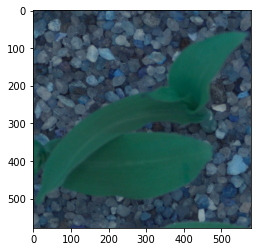

In [41]:
plt.imshow(np.real(prediction_img))
plt.show()

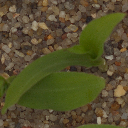

The shape of image to be predicted is:'(578, 578, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 128, 128, 3)'


In [42]:
from google.colab.patches import cv2_imshow

img_pred_resize = cv2.resize(prediction_img,(128,128), interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_pred_resize)
img_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{prediction_img.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_predict.shape}'")

## **Perform the preprocessing steps on prediction image**

In [43]:
pred_img = np.squeeze(img_predict, axis=0)
X_pred_r, X_pred_g, X_pred_b = cv2.split(pred_img)

In [44]:
X_pred_pca_r = X_train_pca_r.transform(np.expand_dims(X_pred_r.flatten(), axis=0))
X_pred_pca_g = X_train_pca_g.transform(np.expand_dims(X_pred_g.flatten(), axis=0))
X_pred_pca_b = X_train_pca_b.transform(np.expand_dims(X_pred_b.flatten(), axis=0))

X_pred_pca = np.concatenate([X_pred_pca_r,X_pred_pca_g,X_pred_pca_b], axis=1)

## **Find prediction and print the predicted label**

In [45]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

rf_score = clf.score(X_val_pca, y_val)
y_pred = clf.predict(X_test_pca)
rf_accuracy = metrics.accuracy_score(y_test, y_pred)
pred_rf = clf.predict(X_pred_pca)[0]
print(f"The predicted label is:'{pred_rf}'")

The predicted label is:'7'


In [47]:
model_performance = model_performance.append({'Model':'RF',
                                              'Accuracy': rf_accuracy,
                                              'Loss': 'NA',
                                              'Predicted Class': pred_rf                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,RF,0.170629,NA,7


## **SVM Classifier**

We'll use GridSearchCV() of SKLearn library. This function helps to loop through predefined hyperparameters and fit the estimator (model) on the training set. We have defined a set of hyperparameters for 'C', 'kernel', and 'gamma' in param_grid.

In [48]:
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV

In [49]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = SVC()
clf = GridSearchCV(svc, param_grid, verbose=10, n_jobs=-1)
clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=10)

In [50]:
GridSearchCV(cv=None,estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=10)

### **Predict Test Image using SVM**

In [51]:
pred_svm = svc.predict(X_pred_pca)[0]

print(f"The predicted label is:'{pred_svm}'")

The predicted label is:'7'


## **Classification using Artificial Neural Network (ANN)**

* An ANN initially goes through a training phase where it learns to recognize patterns in data. 

* During this supervised phase, the network compares its actual output produced with what it was meant to produce—the desired output. 

* The difference between both outcomes is adjusted using backpropagation. This means that the network works backward, going from the output unit to the input units to adjust the weight of its connections between the units until the difference between the actual and desired outcome produces the lowest possible error.

* Let's first import the necessary libraries.

In [52]:
import itertools

import tensorflow
from tensorflow.python.keras.layers import Dense, Dropout, InputLayer, BatchNormalization, Flatten
from tensorflow.python.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPool2D, GlobalMaxPool2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
#from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [53]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y2 = enc.fit_transform(classes)

### **Split the data into train and test set**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y2, test_size=0.3, random_state=50)

In [55]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [56]:
X_train.shape,y_train.shape

((3336, 128, 128, 3), (3336, 12))

In [57]:
num_classes = len(np.unique(y_train))
num_classes

2

In [58]:
img_rows=128
img_cols=128
num_channel=3
batch_size = 32

In [59]:
from keras.models import Sequential
from keras.layers import Dense

def ann_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = None

  model = Sequential()
  input_shape=(None,height, width, num_channels)
  model.add(InputLayer(input_shape=(height, width, num_channels)))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(num_classes, activation = "softmax"))
  opt = tensorflow.keras.optimizers.Adam(lr=0.000001)
  model.compile(optimizer = opt, loss = loss, metrics = metrics)

  model.build(input_shape)
  model.summary()
  return model

In [60]:
ann = ann_model(128,128,3,12)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper (ModuleWrapp  (None, 128, 128, 3)      0         
 er)                                                             
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 module_wrapper_1 (ModuleWra  (None, 49152)            196608    
 pper)                                                           
                                                                 
 dense (Dense)               (None, 1024)              50332672  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 module_wrapper_2 (ModuleWra  (None, 1024)             4

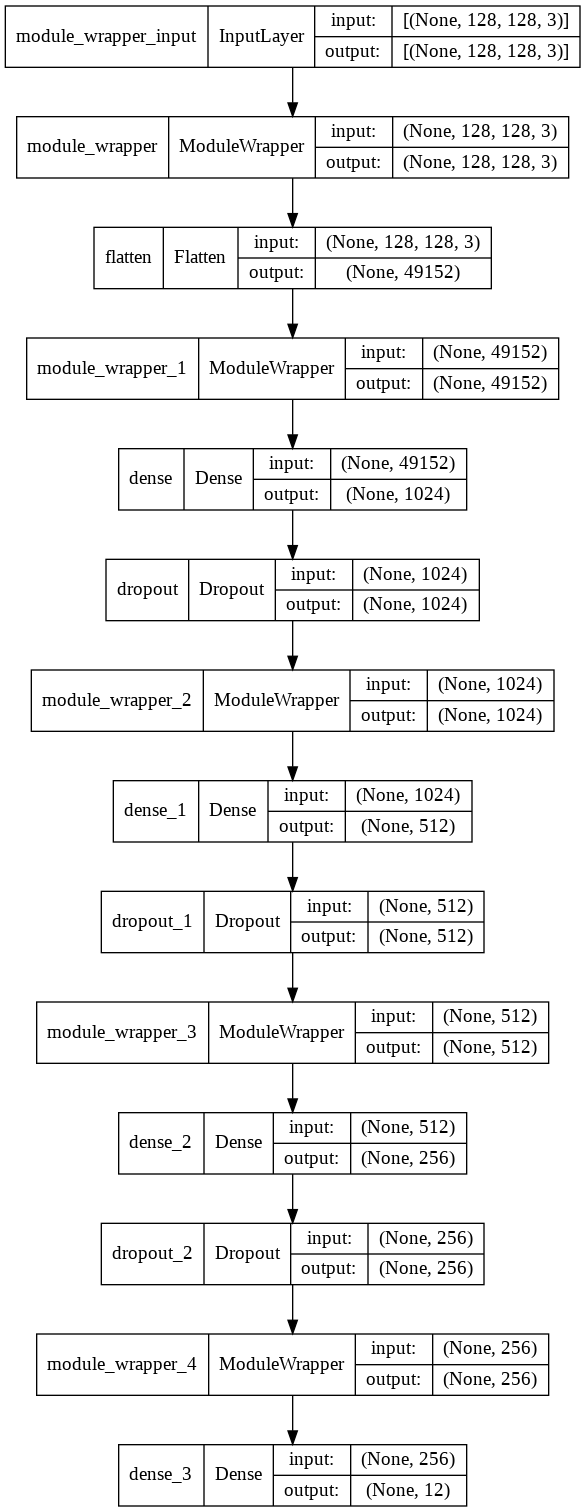

In [62]:
from keras.utils.vis_utils import plot_model
plot_model(ann, to_file='/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/model_ann.png', show_shapes=True, show_layer_names=True)

In [63]:
history = ann.fit(X_train, 
                  y_train, 
                  epochs = 50, 
                  validation_data = (X_val,y_val),
                  batch_size = batch_size)

Epoch 1/50
105/105 [==============================] - 62s 565ms/step - loss: 3.1618 - accuracy: 0.0851 - val_loss: 2.9571 - val_accuracy: 0.0978
Epoch 2/50
105/105 [==============================] - 55s 524ms/step - loss: 3.0226 - accuracy: 0.1010 - val_loss: 2.6016 - val_accuracy: 0.1285
Epoch 3/50
105/105 [==============================] - 55s 525ms/step - loss: 2.9185 - accuracy: 0.1184 - val_loss: 2.5492 - val_accuracy: 0.1466
Epoch 4/50
105/105 [==============================] - 55s 524ms/step - loss: 2.8114 - accuracy: 0.1415 - val_loss: 2.4966 - val_accuracy: 0.1662
Epoch 5/50
105/105 [==============================] - 55s 523ms/step - loss: 2.6966 - accuracy: 0.1637 - val_loss: 2.4481 - val_accuracy: 0.1732
Epoch 6/50
105/105 [==============================] - 55s 525ms/step - loss: 2.5815 - accuracy: 0.1832 - val_loss: 2.3999 - val_accuracy: 0.1802
Epoch 7/50
105/105 [==============================] - 54s 517ms/step - loss: 2.5261 - accuracy: 0.2008 - val_loss: 2.3525 - val_ac

### **Evaluate the ANN model on test data**

In [64]:
ann_loss, ann_accuracy = ann.evaluate(X_test, y_test, verbose=1)
print('Test loss:', ann_loss)
print('Test accuracy:', ann_accuracy)

23/23 [==============================] - 2s 93ms/step - loss: 1.6897 - accuracy: 0.4643
Test loss: 1.6897063255310059
Test accuracy: 0.4643356502056122


**The test accuracy of ANN Model is 45 %**

Let's compare the Training and validation loss and accuracy by plotting graph.


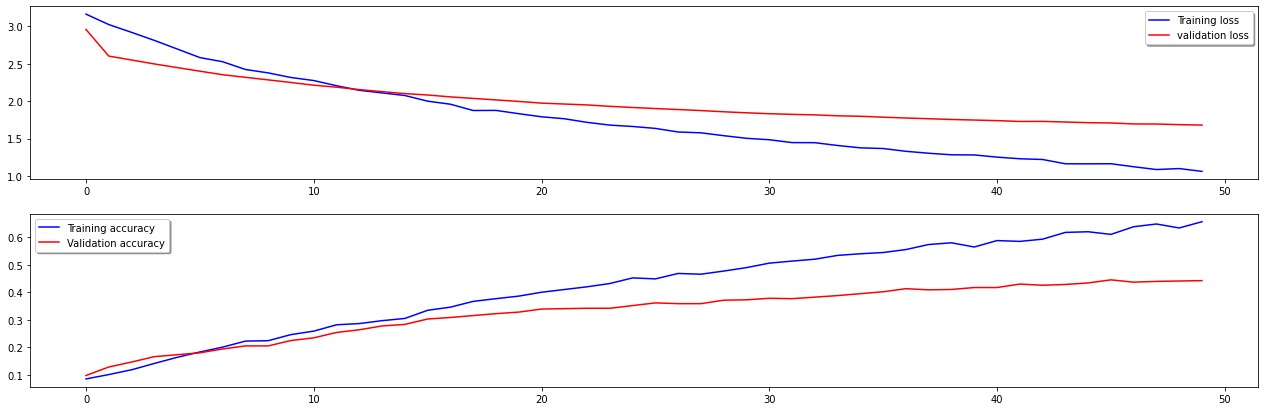

In [65]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**We can see that training accuracy of the model is 65% while validation accuracy is less. The model overfits the data.**

### **Confusion Matrix**

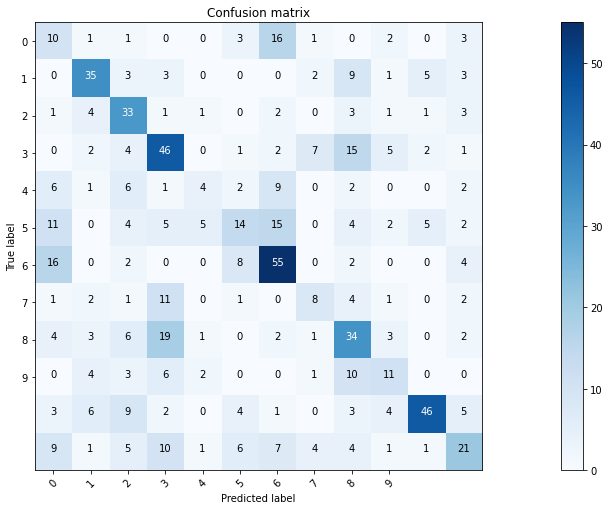

In [66]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = ann.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

**Let's use the ANN model to predict the label of Test Image.**

In [67]:
ann_predict = np.argmax(ann.predict(img_predict))

In [68]:
print('The predicted flower is with label:', ann_predict)

The predicted flower is with label: 7


In [70]:
model_performance = model_performance.append({'Model':'ANN',
                                              'Accuracy': ann_accuracy,
                                              'Loss': ann_loss,
                                              'Predicted Class': ann_predict                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,RF,0.170629,NA,7
1,ANN,0.464336,1.689706,7


### **The ANN model has an accuracy of 0.64 approximately and loss of 1.62 approximately. The loss is high. It can be reduced by modifying the ANN model by adding more dense layers and neurons. We can also try various learning rates of the optimizer.**

# **Classification using Convolution Neural Network (CNN)**

## **Model type: Sequential**

> Indented block

> Indented block





**Layers used:**

0. InputLayer
1. Conv2D (64,64, 128 filters)
2. MaxPool2D
3. GlobalMaxPool2D
4. Batch Normalization
5. Flatten
6. Dropout
7. Dense

Input size: 128 x 128 x 3 (size x colors)

Pool size: 2 x 2 (for MaxPool2D)

Kernel size: 3 x 3 (for Conv2D)

In [71]:
def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = None

  model = Sequential()
  # Input layer
  #model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  #activation ='relu', batch_input_shape = (batch_size,height, width, num_channels)))
  model.add(tf.keras.layers.InputLayer(input_shape=(height, width, num_channels)))

# Here we add a 2D Convolution layer

  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
  model.add(tf.keras.layers.BatchNormalization())

# Here we add a 2D Convolution layer

  #model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
  #model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
  #model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
  model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Normalization layer
  model.add(tf.keras.layers.BatchNormalization())

# 2D Convolution layer
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

# Max Pool layer 
  model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))

# Global Max Pool layer
  model.add(tf.keras.layers.GlobalMaxPool2D())

# Dense Layers after flattening the data
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))

# Dropout
# is used to nullify the outputs that are very close to zero and thus can cause overfitting.
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(64, activation='relu'))

# Normalization layer
  model.add(tf.keras.layers.BatchNormalization())

#Add Output Layer
  model.add(tf.keras.layers.Dense(12, activation='softmax')) # = 12 predicted classes

  optimizer = Adam(lr=0.01)
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics) 
  model.summary()
  return model

In [72]:
cnn = cnn_model(128,128,3,12)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                      

In [73]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/plant_classifier.h5',save_best_only=True, monitor='val_accuracy',mode='max', verbose = 1)                                                
                                                

We'll train the CNN model with train data and validate the model using validation data. We have set the number of epochs as 20.Number of steps per epoch are set equal to length of training data.

In [ ]:
history = cnn.fit(X_train,y_train,
          epochs=20, # Increase number of epochs if you have sufficient hardware
          steps_per_epoch= len(X_train),  
          validation_data=(X_val,y_val),
          validation_steps = len(X_val), 
          callbacks = [checkpoint],
          verbose = 1
)

Epoch 1/20
3336/3336 [==============================] - ETA: 0s - loss: 2.4438 - accuracy: 0.1367
Epoch 00001: val_accuracy improved from -inf to 0.11732, saving model to /content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/plant_classifier.h5
3336/3336 [==============================] - 209s 62ms/step - loss: 2.4438 - accuracy: 0.1367 - val_loss: 19.9979 - val_accuracy: 0.1173
Epoch 2/20
3336/3336 [==============================] - ETA: 0s - loss: 2.4341 - accuracy: 0.1301
Epoch 00002: val_accuracy did not improve from 0.11732
3336/3336 [==============================] - 203s 61ms/step - loss: 2.4341 - accuracy: 0.1301 - val_loss: 24.9279 - val_accuracy: 0.0992
Epoch 3/20
3336/3336 [==============================] - ETA: 0s - loss: 2.4371 - accuracy: 0.1286
Epoch 00003: val_accuracy did not improve from 0.11732
3336/3336 [==============================] - 204s 61ms/step - loss: 2.4371 - accuracy: 0.1286 - val_loss: 32.7438 - val_accuracy: 0.0754
Epoch 4/20
3336/3336 [============

**The model accuracy is too low and loss is also high.** 

**Let's change the batch size and the size of data for training.**

In [74]:
history = cnn.fit(X_train, 
                  y_train, 
                  epochs = 20, 
                  validation_data = (X_val,y_val),
                  batch_size = batch_size)

Epoch 1/20
105/105 [==============================] - 176s 2s/step - loss: 2.0310 - accuracy: 0.2722 - val_loss: 9.3319 - val_accuracy: 0.1718
Epoch 2/20
105/105 [==============================] - 174s 2s/step - loss: 1.8442 - accuracy: 0.3462 - val_loss: 2.1767 - val_accuracy: 0.3003
Epoch 3/20
105/105 [==============================] - 171s 2s/step - loss: 1.6902 - accuracy: 0.3843 - val_loss: 5.8422 - val_accuracy: 0.2095
Epoch 4/20
105/105 [==============================] - 172s 2s/step - loss: 1.4766 - accuracy: 0.4592 - val_loss: 1.8036 - val_accuracy: 0.3366
Epoch 5/20
105/105 [==============================] - 170s 2s/step - loss: 1.3530 - accuracy: 0.5114 - val_loss: 1.5214 - val_accuracy: 0.5112
Epoch 6/20
105/105 [==============================] - 170s 2s/step - loss: 1.2492 - accuracy: 0.5564 - val_loss: 1.5897 - val_accuracy: 0.4176
Epoch 7/20
105/105 [==============================] - 170s 2s/step - loss: 1.1208 - accuracy: 0.6121 - val_loss: 1.2347 - val_accuracy: 0.5978

**The model performed better with 86% training accuracy and 76% validation accuracy.**

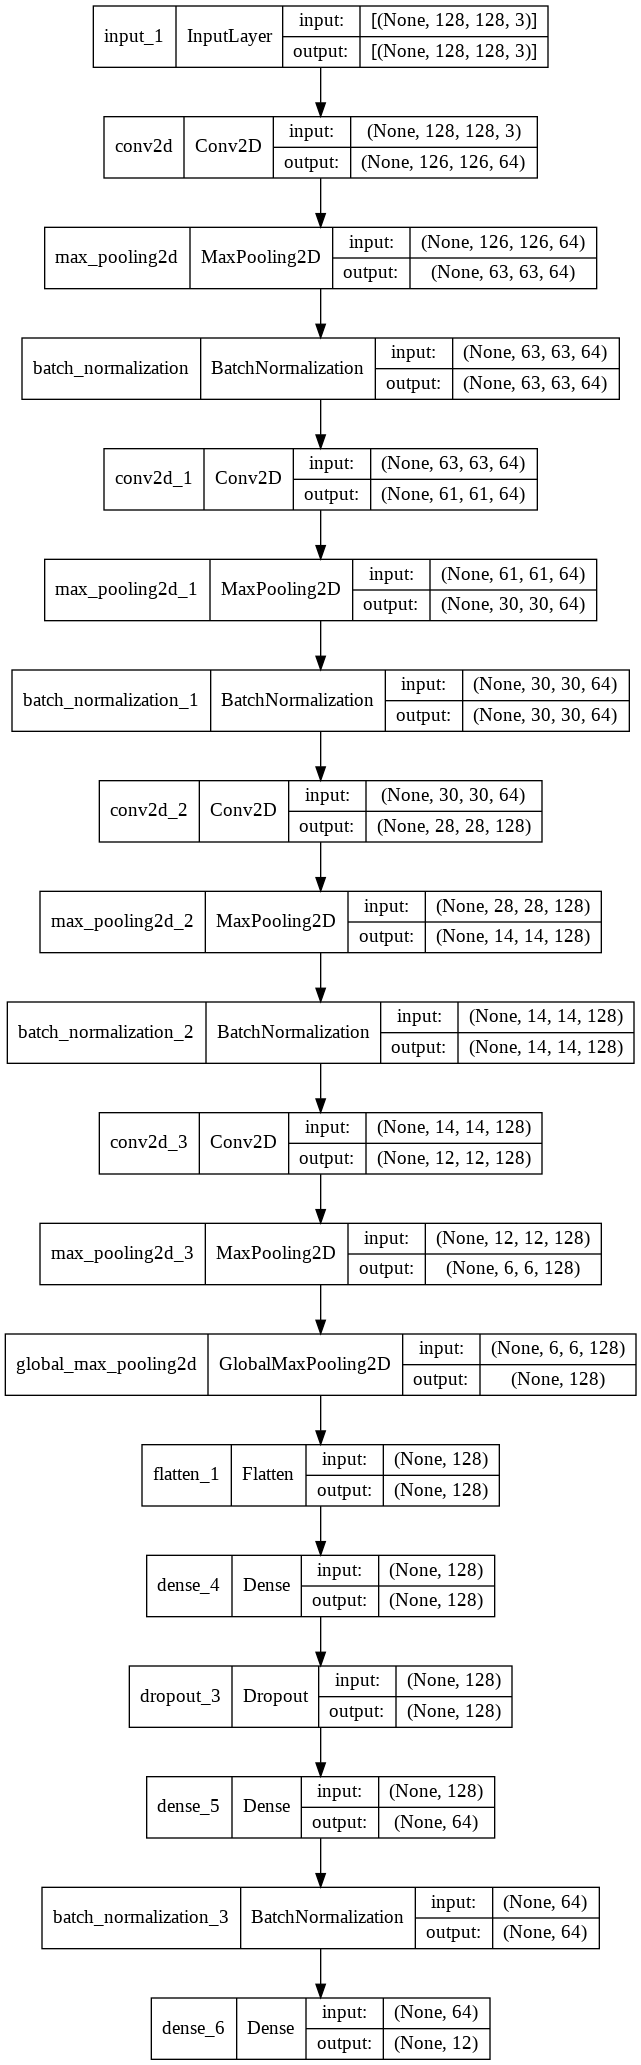

In [75]:
from keras.utils.vis_utils import plot_model
plot_model(cnn, to_file='/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/model_cnn.png', show_shapes=True, show_layer_names=True)

**Evaluating the CNN Classifier Model**

In [76]:
cnn_loss, cnn_accuracy = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

23/23 [==============================] - 9s 373ms/step - loss: 0.7278 - accuracy: 0.7636
Test loss: 0.7277592420578003
Test accuracy: 0.7636363506317139


**Predicting using CNN Classifier Model**

In [77]:
cnn_predict = np.argmax(cnn.predict(img_predict))

In [79]:
model_performance = model_performance.append({'Model':'CNN',
                                              'Accuracy': cnn_accuracy,
                                              'Loss': cnn_loss,
                                              'Predicted Class': cnn_predict                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,RF,0.170629,NA,7
1,ANN,0.464336,1.689706,7
2,CNN,0.763636,0.727759,1


## **Classification using Convolution Neural Network (CNN) with Data Augmentation**

The ImageDataGenerator() from Keras provides a quick and easy way to augment your images. It provides a host of different augmentation techniques like standardization, rotation, shifts, flips, brightness change, and many more.


However, the main benefit of using the Keras ImageDataGenerator class is that it is designed to provide real-time data augmentation. ImageDataGenerator class ensures that the model receives new variations of the images at each epoch. But it only returns the transformed images and does not add it to the original corpus of images. If it was, in fact, the case, then the model would be seeing the original images multiple times which would definitely overfit our model.

Another advantage of ImageDataGenerator is that it requires lower memory usage. This is so because without using this class, we load all the images at once. But on using it, we are loading the images in batches which saves a lot of memory.

In [80]:
 #With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [81]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 50

In [82]:
# X_train, X_test, y_train, y_test
history = cnn.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
66/66 - 186s - loss: 0.4298 - accuracy: 0.8414 - val_loss: 0.4692 - val_accuracy: 0.8547 - lr: 0.0100 - 186s/epoch - 3s/step
Epoch 2/30
66/66 - 180s - loss: 0.3457 - accuracy: 0.8749 - val_loss: 0.4016 - val_accuracy: 0.8534 - lr: 0.0100 - 180s/epoch - 3s/step
Epoch 3/30
66/66 - 178s - loss: 0.3025 - accuracy: 0.8920 - val_loss: 0.5037 - val_accuracy: 0.8408 - lr: 0.0100 - 178s/epoch - 3s/step
Epoch 4/30
66/66 - 178s - loss: 0.3146 - accuracy: 0.8847 - val_loss: 0.5780 - val_accuracy: 0.8282 - lr: 0.0100 - 178s/epoch - 3s/step
Epoch 5/30
66/66 - 178s - loss: 0.2867 - accuracy: 0.8911 - val_loss: 0.5209 - val_accuracy: 0.8492 - lr: 0.0100 - 178s/epoch - 3s/step
Epoch 6/30
66/66 - 178s - loss: 0.2859 - accuracy: 0.8953 - val_loss: 0.5093 - val_accuracy: 0.8380 - lr: 0.0100 - 178s/epoch - 3s/step
Epoch 7/30
66/66 - 178s - loss: 0.2811 - accuracy: 0.9041 - val_loss: 1.2558 - val_accuracy: 0.5992 - lr: 0.0100 - 178s/epoch - 3s/step
Epoch 8/30
66/66 - 178s - loss: 0.2879 - accurac

**Evaluate the CNN model with augmentation**

In [83]:
cnn_loss_aug, cnn_accuracy_aug = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss_aug)
print('Test accuracy:', cnn_accuracy_aug)

23/23 [==============================] - 15s 659ms/step - loss: 0.4690 - accuracy: 0.8727
Test loss: 0.4690438508987427
Test accuracy: 0.8727272748947144


### **Plotting training vs validation loss and training vs validation accuracy.**

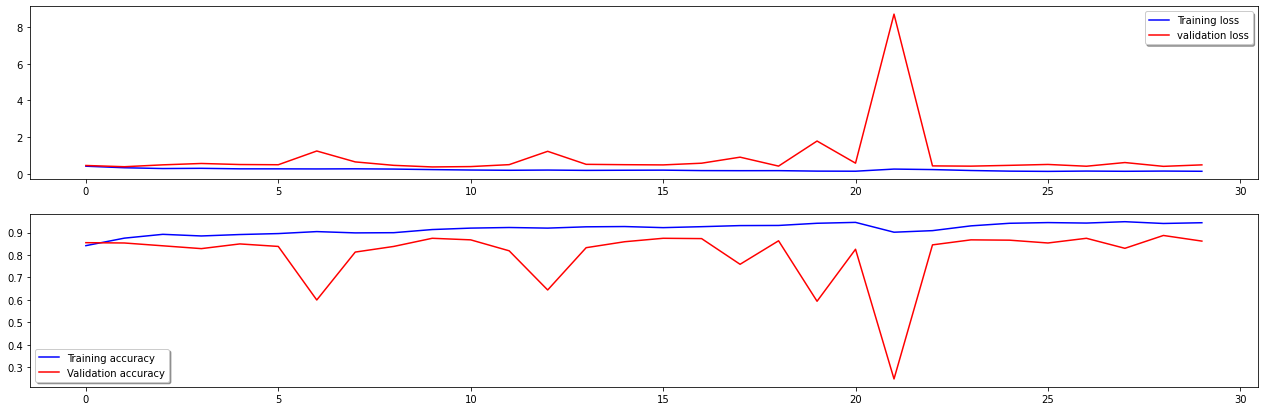

In [84]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Here we can observe that CNN model with data augmentation has worked best on predicting the image with highest 73% test accuracy.

The plot shows validation accuracy as well as loss is fairly mapping training accuracy and training loss respectively.

**Confusion Matrix**

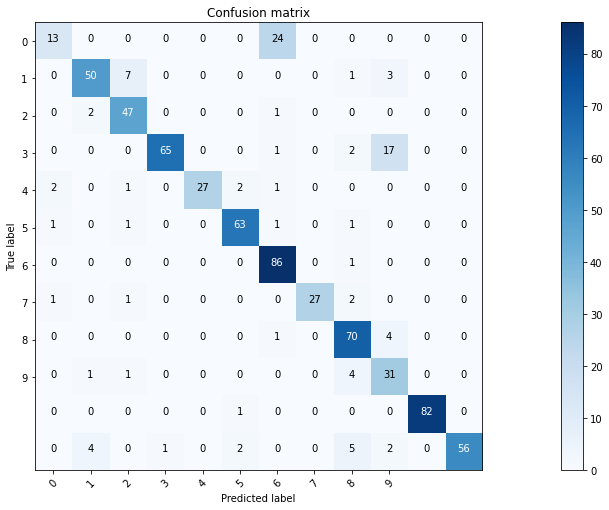

In [85]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = cnn.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

### **Predicting using CNN Classifier Model with Data Augmentation**

In [86]:
cnn_predict_aug = np.argmax(cnn.predict(img_predict))

In [87]:
print('The predicted flower is with label:', cnn_predict_aug)

The predicted flower is with label: 7


In [88]:
model_performance = model_performance.append({'Model':'CNN with Data Augmentaion',
                                              'Accuracy': cnn_accuracy_aug,
                                              'Loss': cnn_loss_aug,
                                              'Predicted Class': cnn_predict_aug                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,RF,0.170629,NA,7
1,ANN,0.464336,1.689706,7
2,CNN,0.763636,0.727759,1
3,CNN with Data Augmentaion,0.872727,0.469044,7


Thus using augmented images, the CNN model has a better accuracy of 81% approximately and with a lesser loss than CNN without data augmentation.

Since, the CNN model with augmented data has a better performance than all the models, we'll save this model.

In [89]:
cnn.save("/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/CNN_PlantSeedling_ImageClassification.h5")

## **Building a tranfer learning model feature extraction using the keras functional API**

Generally, the models are made too wide, deep, or with a very high resolution. Increasing these characteristics helps the model initially but it quickly saturates and the model made just has more parameters and is therefore not efficient. In EfficientNet they are scaled in a more principled way i.e. gradually everything is increased..

With considerably fewer numbers of parameters, the family of models are efficient and also provide better results.

In [90]:
base_model = tf.keras.applications.EfficientNetB0(include_top= False)

base_model.trainable = False 

inputs = tf.keras.layers.Input(shape=(224,224,3), name='Input_Layer') 

x = base_model(inputs) 

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(), 
             metrics=['accuracy']) 

model_history = model.fit(training_data, 
                          steps_per_epoch=len(training_data),
                          validation_data= valid_data,
                        validation_steps= len(valid_data),
                         epochs=5
                         )


Epoch 1/5
120/120 [==============================] - 311s 2s/step - loss: 1.6145 - accuracy: 0.5005 - val_loss: 0.9653 - val_accuracy: 0.7954
Epoch 2/5
120/120 [==============================] - 276s 2s/step - loss: 1.0477 - accuracy: 0.6951 - val_loss: 0.7854 - val_accuracy: 0.8080
Epoch 3/5
120/120 [==============================] - 278s 2s/step - loss: 0.8483 - accuracy: 0.7617 - val_loss: 0.6619 - val_accuracy: 0.8321
Epoch 4/5
120/120 [==============================] - 278s 2s/step - loss: 0.7327 - accuracy: 0.7952 - val_loss: 0.5255 - val_accuracy: 0.8657
Epoch 5/5
120/120 [==============================] - 290s 2s/step - loss: 0.6571 - accuracy: 0.8102 - val_loss: 0.4762 - val_accuracy: 0.8898


### **Evaluate the model**

In [91]:
model.evaluate(valid_data)

30/30 [==============================] - 57s 2s/step - loss: 0.4762 - accuracy: 0.8898


[0.47620871663093567, 0.8898215889930725]

In [92]:
cnn_transf_loss, cnn_transf_accuracy = model.evaluate(valid_data, verbose=1)
print('Test loss:', cnn_transf_loss)
print('Test accuracy:', cnn_transf_accuracy)

30/30 [==============================] - 64s 2s/step - loss: 0.4762 - accuracy: 0.8898
Test loss: 0.47620871663093567
Test accuracy: 0.8898215889930725


**We get high accuracy from the CNN with transfer learning model compared to all other models.**

**The test accuracy is almost 89% and loss is also very less.**

### **Perform Prediction on validation data**

In [93]:
prediction = model.predict(valid_data)

In [94]:
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(prediction[0])
pred_label

'Shepherds Purse'

### **Predict the test image using transfer learning model**

**As the input shape of transfer learning model requires image of shape 224 by 224, resizing the test image for prediction.**

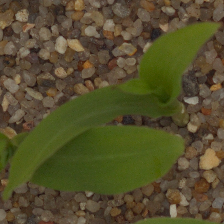

The shape of image to be predicted is:'(578, 578, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 224, 224, 3)'


In [95]:
from google.colab.patches import cv2_imshow

img_pred_resize = cv2.resize(prediction_img,(224,224), interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_pred_resize)
image_predict = np.expand_dims(img_pred_resize, axis=0)
print(f"The shape of image to be predicted is:'{prediction_img.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{image_predict.shape}'")

In [96]:
cnn_transf_predict = np.argmax(model.predict(image_predict))

In [97]:
print('The predicted flower is with label:', cnn_transf_predict)

The predicted flower is with label: 7


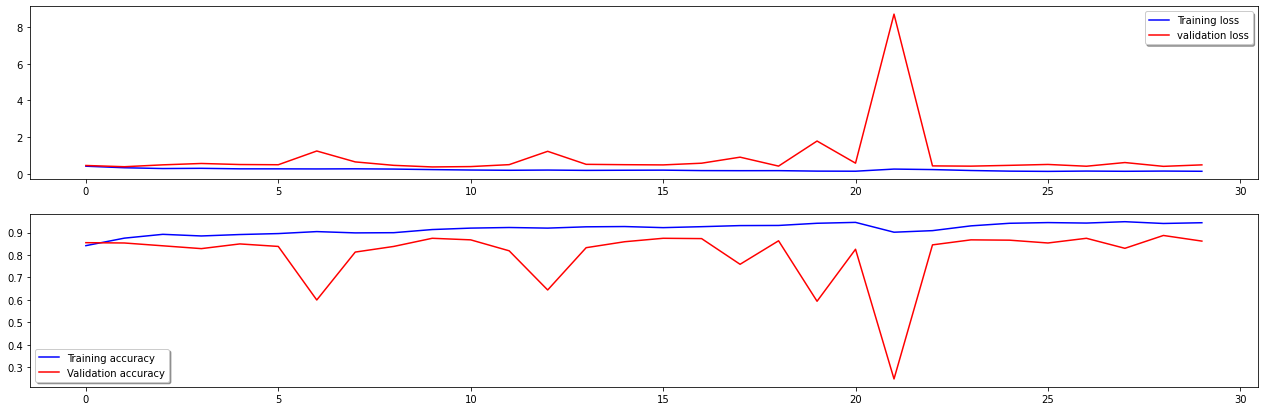

In [103]:
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [98]:
model_performance = model_performance.append({'Model':'CNN with Tranfer Learning',
                                              'Accuracy': cnn_transf_accuracy,
                                              'Loss': cnn_transf_loss,
                                              'Predicted Class': cnn_predict_aug                                      
                                              }, ignore_index=True)

model_performance

,Model,Accuracy,Loss,Predicted Class
0,RF,0.170629,NA,7
1,ANN,0.464336,1.689706,7
2,CNN,0.763636,0.727759,1
3,CNN with Data Augmentaion,0.872727,0.469044,7
4,CNN with Tranfer Learning,0.889822,0.476209,7


## **3.** **Compare the results from the above step along with your detailed observations on the best performing algorithm and why/how it outperforms other algorithms in this case**. 

* Convolution Neural Networks outperforms Neural Networks and which in turn out perform Supervised Learning models.

* The best part of CNNs is high accuracy of image prediction and less loss. Also, we do not have to do feature extraction. The system learns to do feature extraction and the core concept of CNN is, it uses convolution of image and filters to generate invariant features which are passed on to the next layer. 

* The features in the next layer are convoluted with different filters to generate more invariant and abstract features and the process continues till one gets final feature / output which is invariant to occlusions. 

* ANNs are better than Supervised Learning models because we don't have to perform feature extraction in ANNs whereas in Supervised Learning, we must perform the Principal component analysis (PCA) to compute the principal components in images.

* In predicting the Plant Seedlings dataset, we can see that the accuracy of Random Forest and Support Vector Machines models are less than 20%. 

* Using ANNs, the accuracy increased to 45%. This was improved much more by using CNNs. The accuracy increased to approximately 76% with less loss. CNNs with Data Augmentation has the highest accuracy of 87%. 

* ### It can clearly be observed that ***CNN WITH TRANSFER LEARNING*** **outperformed** over all the models with **accuracy score of 89%** and **loss of 0.47**.

### **Let's pickle this model for future use.**



## **4. Pickle the best performing model.**

When we want to use a trained model, we convert the pickle file (pickle_cnn.pickle) back to a classifier model(cnn_transf_predict). Any time we want to use a classifier in our program, we just use pickle_cnn.

In [101]:
import pickle

with open('/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/cnn_transf_model.pickle', 'wb') as dump_var:
    pickle.dump(model, dump_var)

# Load the Pickle file in the memory
pickle_in = open('/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT/cnn_transf_model.pickle', 'rb')
pickle_cnn = pickle.load(pickle_in)

INFO:tensorflow:Assets written to: ram://5ed2ee27-f67b-4ba3-b676-c70190b95a45/assets


INFO:tensorflow:Assets written to: ram://5ed2ee27-f67b-4ba3-b676-c70190b95a45/assets


## **5.** **Import the the test image** **[from the “ Prediction” folder]** **to predict the class. Display the image. Use the best trained image classifier model to predict the class.**


## **Use the best model to predict the data**

**Let's use the pickle model for prediction and check if the prediction is same as that of prediction made by model before pickling.**



In [102]:
# Use the Pickle file to save best model.

cnn_transf_predict = np.argmax(model.predict(image_predict))
cnn_transf_predict_pkl = np.argmax(pickle_cnn.predict(image_predict))
print(cnn_transf_predict == cnn_transf_predict_pkl)

True


**The original classifier and pickled classifier are the same. This can be proved by comparing the prediction achieved by both of them on the same testing set. When compared, we are returned True, which shows the prediction are the same and proves that the classifiers are the same.**

### **BEST MODEL -CNN WITH TRANSFER LEARNING -TEST ACCURACY - 89%**


## ---------------**END** ----------